# First Project 

## Authors: Jan Frese and Bruno Picasso

### For this project, we chose the "Insurance" dataset. This base contains an amount of observations about the medical insurance costs from 1400 patients approximately.

### The main objective to model is to know is if the charges of the patients are related to the bmi and his age, where "charges" is the dependent variable while "bmi" and "age" are the independent variables. These variables where chosen, because it's interesting to know if younger or older patients have higher or lower charges in their medical insurance. It could be also interesting to know if their body mass index is related to this variable (charges).

In [4]:
import pystan
import pandas as pd
import arviz 
import numpy as np

In [5]:
datos  = pd.read_csv("insurance.csv")

# dependent variable:charge y independt variables: sex and smoker
datos.head()
#len(datos)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The minimum is: 18 and the maximum is: 64


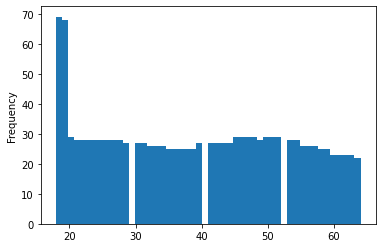

In [3]:
# graficos bmi, age, charge
datos["age"].plot.hist(bins=50)
# aprox uniform
mx = max(datos["age"])
mn = min(datos["age"])
print(f"The minimum is: {mn} and the maximum is: {mx}")

The mean is: 31.0 and the standard deviation is: 6.0


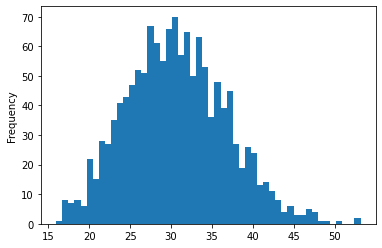

In [4]:
datos["bmi"].plot.hist(bins=50)
# aprox normal
u = np.mean(datos["bmi"]).round()
s = np.std(datos["bmi"]).round()
print(f"The mean is: {u} and the standard deviation is: {s}")

13270.0

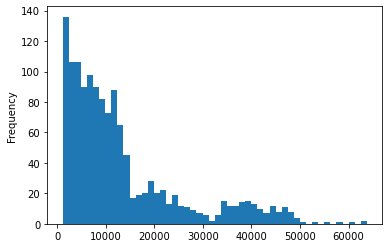

In [7]:
datos["charges"].plot.hist(bins=50)
# aprox chi-squared
np.mean(datos["charges"]).round()

### To describe the chosen dataset, it is important to know that it has 1338 observations with 7 variables, which are the age of the patient, their gender, their bmi, how many children they have, if they smoke, their region and their amount of charges. Two of the seven variables could be considered as binary, which are "sex" (male or female) and smoker (yes or no). The age of the patients, their bmi, their number of children and their charges can be considered as numerical, while their region could be considered as a factor variable.

### Now, we will show more specific parameters and distributions referring to the variables to evaluate.

### As we can see, the first histogram refers to the age of the patients. It can be considered as a uniform distribution or a quassiuniform, because all the parameters stay constant (except for the age of 20). The minimum value is the age of 18 and their maximum is 64.

### Related to the second histogram, which refers to the bmi, we can see that their distribution is approximately normal, with some outliers in the 50 value. The mean of this variable is 31 approximately and their standard deviation is 6 approximately.

### Finally, it is important to explain that the third histogram refers to the dependent variable named "charges". In this histogram we can see that most of the values are between 0 and 15.000 approximately. Due to this amount of values, we can see that the mean of this variable is 13.270 approximately. 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()  
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] z;
}
parameters {
    real alpha;
    real beta;
    real gamma;
    real<lower=0> sigma;
}
model {
    z ~ uniform(18,80;
    x ~ normal(31,6);
    sigma ~ normal(0,1)
    
    y ~ normal(alpha + beta * x + gamma * z, sigma);  
}
"""


### For the definition of the model, we considered three variables (as we explained before): charges, age and bmi. The two independent variables (age and bmi) were named as X and Z. The "X" variable has a normal distribution with parameters 18 and 64 (minimum and maximum), while the "Z" variable has a uniform distribution with parameters 31 and 6 (mean and standard deviation).

### For the prior analysis, we thought that the independent variables where following a normal distribution, but when we analyzed them, we concluded that bmi where following a normal distribution and the age of the patients where following a uniform distribution.

### It is relevant to explain that this two distributions with their parameters where chosen by the histograms that their reflect.

### Also, the model where defined with a non negative condition, so the model adapts better for the observations and to minimize the errors of the model.

### We set a seed with random values, so the model could fit with the given values of the dataset.

### Finally, it is important to say that the dependent variable (charges) where defined as an "Y" variable, that is composed of the X and Z variables, with their respective parameters, that are beta for X, gamma for Z, alpha as an intercept and sigma for Y. 

In [12]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0


# Generate and plot data
x = datos['bmi']
z = datos['age']
y = alpha + beta * x + sigma * z
y = datos['charges']

In [13]:
# Put our data in a dictionary
data = {'N': len(y), 'x': x, 'y': y, 'z':z}

# Compile the model
sm = pystan.StanModel(model_code=model)

# Train the model and generate samples
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_89dbc546171c996d3e2c2663619f0354 NOW.


In [8]:
print(fit.stansummary())

Inference for Stan model: anon_model_89dbc546171c996d3e2c2663619f0354.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  -6516   59.67 1771.1 -1.0e4  -7681  -6416  -5352  -3196    881    1.0
beta  335.54    1.57  51.65 237.19 300.44 334.13 371.84 436.11   1076    1.0
gamma 242.48    0.67  22.76 198.89  227.7 242.21  257.0 291.36   1138    1.0
sigma  1.1e4    5.38 216.82  1.1e4  1.1e4  1.1e4  1.2e4  1.2e4   1625    1.0
lp__  -1.3e4    0.05   1.46 -1.3e4 -1.3e4 -1.3e4 -1.3e4 -1.3e4    713    1.0

Samples were drawn using NUTS at Tue Apr 26 22:03:46 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


### As we can see in the fitted summary from the defined model, the mean of the coefficients are -6.516 for alpha, 335,54 for beta, 242,48 for gamma, 11.000 for sigma and his lp__ is -13.000. This means that the proposed model is not very good to predict the dependent variable named "charges".
### We can interpretate this values as this:
#### Charges ~ Normal(-6.516 + 335,54 * bmi + 242,48 * age, 10.000)


### Due that every Rhats are 1, we can conclude that this potential scale reduction on split chains are practically 100% convergible with the defined model.

### Also, we have the standard deviation of this parameters, which are 1.771,1 for alpha, 51,65 for beta, 22,76 for gamma, 216,83 for sigma and 1,46 for lp__.

### The n_eff of the parameters are all higher than 700, which means that the sample size of the parameters must be over 700.

### Finally, the se_mean for each parameter are lower than 5, in exception for alpha, which is 59,67. That means that this parameter has a higher deviation than the rest.

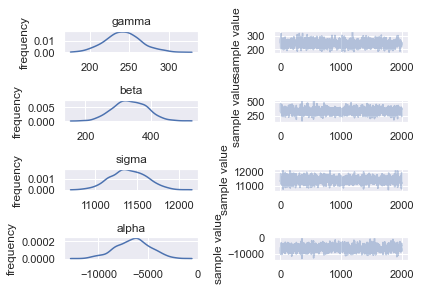

In [12]:
fit.plot(['gamma', "beta", "sigma", "alpha"]);
plt.tight_layout()

### Related to the graphics that are above this explanation, it is important to say that the 4 parameters have a normal distribution and the series of plots are exhibing “thick-haired” chains oscillating, that means a “reasonably-sized” interval in the real line to indicate good mixing.